In [1]:
import numpy as np
import corner
import matplotlib.pyplot as plt

In [2]:
ordering = 'N'
dnn = np.load('./contour_{}O/dnn.npz'.format(ordering))
nf = np.load('./contour_{}O/nf.npz'.format(ordering))
cvae = np.load('./contour_{}O/cvae.npz'.format(ordering))
bnn = np.load('./contour_{}O/bnn.npz'.format(ordering))

dnn_arr = dnn['arr_0']
nf_arr = nf['arr_0']
cvae_arr = cvae['arr_0']
bnn_arr = bnn['arr_0']

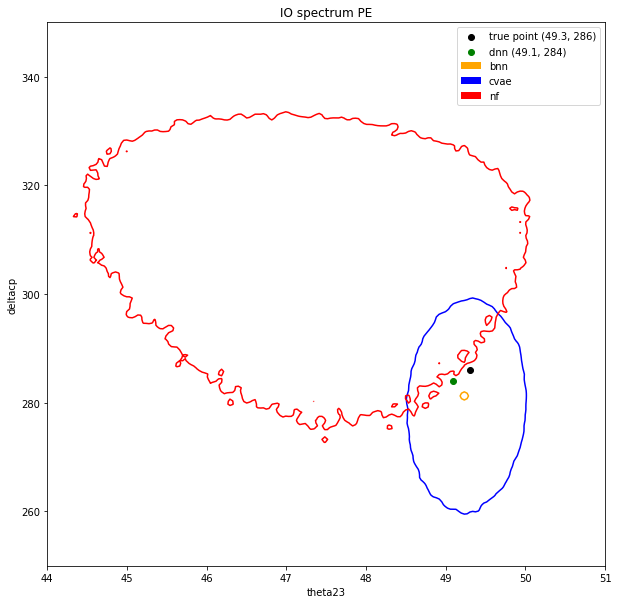

In [3]:
plt.figure(figsize=(10,10))
if ordering =='I': range = [[44,51], [150, 225]]
else: range = [[44,51], [250, 350]]

bnn_delta = np.angle(bnn_arr[:, 2] + 1j*bnn_arr[:, 3], deg=True)
bnn_delta = np.where(bnn_delta > 0 , bnn_delta, bnn_delta+360)
corner.hist2d(bnn_arr[:, 1]*180/np.pi, bnn_delta,
                    levels=(0.68,),
                    scale_hist=True,
                    plot_datapoints=False,
                    color='orange',
                    labels= ["$\\theta_{23} $($^\circ$)", "$\delta_{cp} $($^\circ$)"],
                    range=range,
                    plot_contours = True,
                    plot_density = False,
                    fontsize=30,
                    bins = [200, 200],
                    label_kwargs={"fontsize": 30},
                    smooth=True
                   )

corner.hist2d(cvae_arr[:, 1]*180/np.pi, cvae_arr[:, 2]*180/np.pi,
                    levels=(0.68,),
                    scale_hist=True,
                    plot_datapoints=False,
                    color='blue',
                    labels= ["$\\theta_{23} $($^\circ$)", "$\delta_{cp} $($^\circ$)"],
                    range=range,
                    plot_contours = True,
                    plot_density = False,
                    fontsize=30,
                    bins = [200, 200],
                    label_kwargs={"fontsize": 30},
                    smooth=True
                   )

nf_delta = np.angle(nf_arr[:, 2] + 1j*nf_arr[:, 3], deg=True)
nf_delta = np.where(nf_delta > 0 , nf_delta, nf_delta+360)
corner.hist2d(nf_arr[:, 1]*180/np.pi, nf_delta,
                    levels=(0.68,),
                    scale_hist=True,
                    plot_datapoints=False,
                    color='red',
                    labels= ["$\\theta_{23} $($^\circ$)", "$\delta_{cp} $($^\circ$)"],
                    range=range,
                    plot_contours = True,
                    plot_density = False,
                    fontsize=30,
                    bins = [200, 200],
                    label_kwargs={"fontsize": 30},
                    smooth=True
                   )
if ordering == 'I':
    true_point = plt.scatter(49, 195, label = "true point", c='k')
    dnn_prediction = plt.scatter(49.188957, 196.26898, c='green')
else:
    true_point = plt.scatter(49.3, 286., label = "true point", c='k')
    dnn_prediction = plt.scatter(49.09027, 283.9852, c='green')

proxy = [plt.Rectangle((2, 2), 0.0, 3, 90, fc=c) for c in ['orange', 'blue', 'red']]
if ordering == 'I':
    plt.legend([true_point, dnn_prediction] + proxy,
            ["true point (49, 195)", "dnn (49.2, 196.2)", "bnn", "cvae", "nf"])
else:
    plt.legend([true_point, dnn_prediction] + proxy,
            ["true point (49.3, 286)", "dnn (49.1, 284)", "bnn", "cvae", "nf"])

plt.title("IO spectrum PE")
plt.xlabel('theta23')
plt.ylabel('deltacp')
plt.show()